# Model on Adult Data from UCI Machine Learning Repository

The dataset is collected from the 1994 Census database, also known as "Census Income" dataset. 
The purpose of this project is to predict whether a person's income exceeds $50K annually, i.e., it is a binary classification problem. 

## Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

## Data Loading

The data is separated into two parts: training (adult.data) and validation (adult.test) datasets, with 14 features and 1 label, total 15 columns. 

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
          'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
          'hours-per-week', 'native-country', 'income']

In [3]:
df = pd.read_csv('adult.data', names=columns)

In [4]:
df['type']='training'

In [5]:
df_test = pd.read_csv('adult.test', names=columns, skiprows=1)

In [6]:
df_test['type'] = 'test'

In [7]:
df_combine = pd.concat([df, df_test], sort=False)

In [8]:
df_combine.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'type'],
      dtype='object')

In [9]:
def plotDist(column):
    temp_positive = df[df['income']==' >50K'].groupby(column)['income'].count().reset_index()
    temp_negative = df[df['income']==' <=50K'].groupby(column)['income'].count().reset_index()

    plt.figure(figsize=(20,10))
    plt.bar(temp_positive[column], temp_positive['income'], color='b')
    plt.bar(temp_negative[column], temp_negative['income'], color='r', alpha=0.5)    

In [10]:
df_combine['occupation2'] = df_combine.apply(lambda row: 'unknown' if row['occupation']==' ?' else row['occupation'], axis=1)
df_combine['country'] = df_combine.apply(lambda row: 'unknown' if row['native-country']==' ?' else row['native-country'], axis=1)
df_combine['workclass2'] = df_combine.apply(lambda row: 'unknown' if row['workclass']==' ?' else row['workclass'], axis=1)
df_combine['y'] = df_combine.apply(lambda row: 1 if (row['income']==' >50K' or row['income']==' >50K.') else 0, axis=1)

In [11]:
category_cols = ['workclass2', 'education', 'marital-status', 'occupation2', 'relationship', 'race', 'sex', 'country']
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [13]:
oe = OrdinalEncoder()

In [14]:
transformed_features = oe.fit_transform(df_combine[category_cols].values)

In [15]:
transformed_df = pd.DataFrame(transformed_features, index=df_combine.index, columns=df_combine[category_cols].columns)

In [16]:
df_merge = pd.concat([df_combine[numerical_cols+['type', 'y']], transformed_df], axis=1)

In [17]:
df_merge

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,type,y,workclass2,education,marital-status,occupation2,relationship,race,sex,country
0,39,77516,13,2174,0,40,training,0,6.0,9.0,4.0,0.0,1.0,4.0,1.0,38.0
1,50,83311,13,0,0,13,training,0,5.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0
2,38,215646,9,0,0,40,training,0,3.0,11.0,0.0,5.0,1.0,4.0,1.0,38.0
3,53,234721,7,0,0,40,training,0,3.0,1.0,2.0,5.0,0.0,2.0,1.0,38.0
4,28,338409,13,0,0,40,training,0,3.0,9.0,2.0,9.0,5.0,2.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0,0,36,test,0,3.0,9.0,0.0,9.0,1.0,4.0,0.0,38.0
16277,64,321403,9,0,0,40,test,0,8.0,11.0,6.0,14.0,2.0,2.0,1.0,38.0
16278,38,374983,13,0,0,50,test,0,3.0,9.0,2.0,9.0,0.0,4.0,1.0,38.0
16279,44,83891,13,5455,0,40,test,0,3.0,9.0,0.0,0.0,3.0,1.0,1.0,38.0


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4,  max_features=8)

In [20]:
df_train, df_test = df_merge[df_merge['type']=='training'], df_merge[df_merge['type']=='test']

In [21]:
x_train, y_train = df_train[category_cols+numerical_cols].values, df_train['y'].values

In [22]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
rf.feature_importances_

array([5.49450799e-05, 1.31402389e-02, 1.21944140e-01, 2.66650515e-04,
       3.47059558e-01, 1.61724189e-05, 1.51271280e-03, 1.29116571e-05,
       1.60780896e-02, 2.98582699e-04, 2.12497747e-01, 2.59891523e-01,
       1.88076209e-02, 8.41910799e-03])

In [24]:
category_cols+numerical_cols

['workclass2',
 'education',
 'marital-status',
 'occupation2',
 'relationship',
 'race',
 'sex',
 'country',
 'age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [25]:
importance = pd.DataFrame(zip(category_cols+numerical_cols,rf.feature_importances_), columns=['feature', 'importance'] )

In [26]:
importance.sort_values('importance')

,feature,importance
7,country,0.000013
5,race,0.000016
0,workclass2,0.000055
3,occupation2,0.000267
9,fnlwgt,0.000299
6,sex,0.001513
13,hours-per-week,0.008419
1,education,0.013140
8,age,0.016078
12,capital-loss,0.018808


In [27]:
x_test, y_test = df_test[category_cols+numerical_cols].values, df_test['y'].values

In [28]:
prediction = rf.predict_proba(x_test)

In [29]:
prediction[:, 1]

array([0.02597264, 0.32817016, 0.31887092, ..., 0.66086666, 0.17459224,
       0.65504678])

In [30]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

In [31]:
result = pd.DataFrame(zip(y_test, prediction[:, 1]), columns=['actual', 'prediction'])

In [32]:
result

,actual,prediction
0,0,0.025973
1,0,0.328170
2,1,0.318871
3,1,0.886264
4,0,0.025973
...,...,...
16276,0,0.149383
16277,0,0.037429
16278,0,0.660867
16279,0,0.174592


In [33]:
tp, tn, fp, fn = [], [], [], []
for i in range(100):
    threshold = i/100
    tp.append(len(result[(result['prediction']>=threshold) & (result['actual']==1)]))
    tn.append(len(result[(result['prediction']<threshold) & (result['actual']==0)]))
    fp.append(len(result[(result['prediction']>=threshold) & (result['actual']==0)]))
    fn.append(len(result[(result['prediction']<threshold) & (result['actual']==0)]))    

In [38]:
precision, recall = [], []
for i in range(97):
    precision.append(tp[i]/(tp[i]+fp[i]))
    recall.append(tp[i]/(tp[i]+fn[i]))    

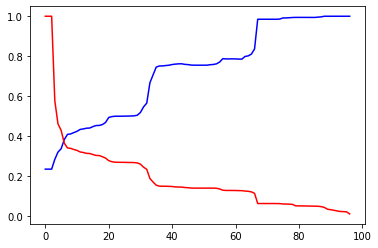

In [39]:
plt.plot(precision, c='b')
plt.plot(recall, c='r')

In [41]:
train_prediction = rf.predict_proba(x_train)

In [42]:
train_result = pd.DataFrame(zip(y_train, train_prediction[:, 1]), columns=['actual', 'prediction'])

In [43]:
tp, tn, fp, fn = [], [], [], []
for i in range(100):
    threshold = i/100
    tp.append(len(train_result[(train_result['prediction']>=threshold) & (train_result['actual']==1)]))
    tn.append(len(train_result[(train_result['prediction']<threshold) & (train_result['actual']==0)]))
    fp.append(len(train_result[(train_result['prediction']>=threshold) & (train_result['actual']==0)]))
    fn.append(len(train_result[(train_result['prediction']<threshold) & (train_result['actual']==0)]))    

In [44]:
precision, recall = [], []
for i in range(96):
    precision.append(tp[i]/(tp[i]+fp[i]))
    recall.append(tp[i]/(tp[i]+fn[i]))    

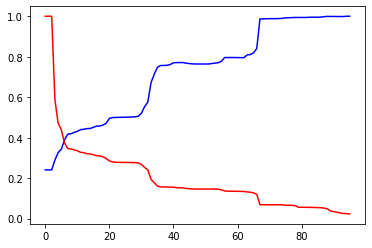

In [45]:
plt.plot(precision, c='b')
plt.plot(recall, c='r')

In [46]:
rf.score(x_test, y_test)

0.8445427185062343

In [47]:
rf.score(x_train, y_train)

0.8446300789287798